# Derivative(미분)
* 2개의 값 간의 영향도를 구하는 방법
* 1차 방정식에서의 Gradient(기울기)를 의미함
* X(독립 변인) 값을 변화 시켰을 때 Y(종속 변인)이 변화한는 양을 의미

1. weight에 대한 loss function의 미분
- weight를 아주 조금 변화시켰을 때 loss Function 값이 어떻게 변하는가
- 음수 -> weight을 양의 뱡향으로 변환 -> loss 감소
- 양수 -> weight을 음의 방향으로 변환 -> loss 감소

2. 수치미분
- 차분 : 두점에서의 함수 값들의 차이
- 아주 작은 차분으로 미분하는것

- x에 대한 f(x)의 변화량
- 변화량을 한없이 0에 가깝게 함
- lim(h->0) (f(x+h) - f(x)) / (h)

In [ ]:
def numerical_diff(f, x):
    """
    미분의 단순 구현
    """
    h = 10e-50 #매우 작은 값
    return (f(x+h) - f(x)) / h

## 문제점 1 : 너무 작은 변화량
개선 : 너무 작은 값으로  설정하면 0이 되므로 h = 1e-4(0.0001) 정도가 적당함

In [ ]:
import numpy as np

np.float32(1e-50) # 0.0

0.0

In [ ]:
def numerical_diff(f, x):
    """
    개선 1
    """
    h = 10e-4 #매우 작은 값
    return (f(x+h) - f(x)) / h

## 문제점 2 : 근사값의 오차
개선 : 중심(중앙) 차분 (x+h) 와 (x-h)일 때의 함수 f의 차분 계산

In [ ]:
def numerical_diff(f,x):
    """
    개선 2
    """
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 예시

In [ ]:
import matplotlib.pylab as plt

def function_1(x):
    return 0.01 * (x**2) +0.1*x

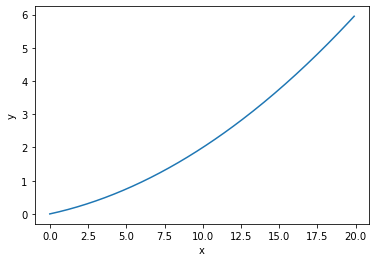

In [ ]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 30까지 0.1 간격의 배열 x 생성
y = function_1(x) 
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show() # function_1 의 그래프

## 미분 값의 비교
* 비교적 유사한 결과 계산

In [ ]:
# 실제 미분 f'(x) = 0.02x + 0.1

print('%.20f' % numerical_diff(function_1, 5)) # f'(5) = 0.2
print('%.20f' % numerical_diff(function_1, 10)) # f'(10) = 0.3 

0.19999999999908979476
0.29999999999863469213


## 편미분
* 변수가 여러 개인 함수에 대한 미분


In [ ]:
# f(x0, x1) = x0^2 + x12
def function_2(x):
    return x[0]**2 + x[1]**2 # 또는 np.sum(x**2)

In [ ]:
# x0에 대한 편미분 (x0,x1) = (3,4)
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
# x1에 대한 편미분 (x0,x1) = (3,4)
def function_tmp2(x1):
    return 3.0**2.0 + x1**2.0

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 기울기
* 기울기는 방향을 가진 벡터
* 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx] # 다시 원래 x 값 저장

        # f(x+h)
        x[idx] = float(tmp_val) + h # x[idx] 에 x+h 값을 저장해두고
        fxh1 = f(x) # x 전체에 대해 f 함수 적용

        # f(x-h)
        x[idx] = tmp_val - h # x[idx] 에 x-h 값을 저장해두고
        fxh2 = f(x) # x 전체에 대해 f 함수 적용

        grad[idx] = (fxh1 - fxh2) / (2*h) # 차분
        x[idx] = tmp_val # 다시 원래 x 값 저장
    return grad


In [ ]:
print(numerical_gradient(function_2, np.array([3.0,4.0]))) #(6,8) = (x0에 대한 편미분, x1에 대한 편미분)
print(numerical_gradient(function_2, np.array([0.0,2.0]))) #(0,4) = (x0에 대한 편미분, x1에 대한 편미분)
print(numerical_gradient(function_2, np.array([3.0,0.0]))) #(6,0) = (x0에 대한 편미분, x1에 대한 편미분)

[6. 8.]
[0. 4.]
[6. 0.]


# 경사하강법
* 기울기 a가 정답 값(0)에서 멀어질수록 오차 값이 커짐
* 따라서 오차가 최소가 되는 m 값을 찾는 것이 목표

* a1에서의 미분을 계산
* 구해진 기울기의 반대방향으로 a 값 이동
* 이동한 a2에서 미분 계산
* 미분 값이 0이 될 때까지 반복

* 학습률 : 하이퍼 파라미터 -> a가 얼마나 많이 이동할지 결정
* 너무 크면 수렴하지 못하고 발산 함
* 너무 작으면 끝까지 수렴하지 못하고 중간에 중단 됨
* 하이퍼 파라미터 : 사람이 직접 설정하는 부분

* a로 편미분
* b로 편미분

경사 하강법
* 머신 러닝 대부분의 알고리즘에서 학습 시 최적의 weight를 찾아내는 방법
* 미분을 이용하여 weight와 loss Function 간의 기울기(영향도) 파악
* 미분을 통해 얻은 기울기를 이용해 loss Function을 줄이는 방향으로 weight 값을 반복적으로 변경
* loss Function을 최소로 하는 최적의 weight 값을 찾아과는 과정을 Gradient Descent라고 함

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    """
    f : 최적화하려는 함수
    init_x : 초기값
    lr : 학습률
    step_num : 경사하강법 반복 횟수 
    """
    x = init_x 
    for i in range(step_num): # 반복
        grad = numerical_gradient(f,x) # 기울기 계산
        x -= lr * grad # 기울기에 학습률을 곱하여 x 값에 반영
    return x

In [ ]:
init_x = np.array([-3.0,4.0]) # 초기 값 설정
# 경사하강법으로 기울기가 0인 지점 탐색
pos = gradient_descent(function_2, init_x=init_x, lr=0.1,step_num=100) 
print('%.30f %.30f' % (pos[0],pos[1]))

# 탐색한 pos의 기울기 계산
grad = numerical_gradient(function_2,pos)
print('%.20f %.20f' % (grad[0],grad[1]))

-0.000000000611110792899878894642 0.000000000814814390531427059884
-0.00000000122222158580 0.00000000162962878107


## 학습률 변화에 따른 결과 변화

In [ ]:
# 학습률이 클 경우 큰 값으로 발산
init_x = np.array([-3.0,4.0])
pos = gradient_descent(function_2, init_x=init_x, lr=10.0,step_num=100) 
print(pos)
print('%.30f %.30f' % (pos[0],pos[1]))

grad = numerical_gradient(function_2, pos)
print('%.30f %.30f' % (grad[0],grad[1]))

[-2.58983747e+13 -1.29524862e+12]
-25898374737328.363281250000000000000000000000 -1295248616896.539794921875000000000000000000
0.000000000000000000000000000000 0.000000000000000000000000000000


In [ ]:
# 학습률이 작을경우 weight가 거의 변화하지 않음
init_x = np.array([-3.0,4.0])
pos = gradient_descent(function_2, init_x=init_x, lr=1e-10,step_num=100) 
print(pos)

grad = numerical_gradient(function_2, pos)
print('%.30f %.30f' % (grad[0],grad[1]))

[-2.99999994  3.99999992]
-5.999999880010875585867324844003 7.999999840002658402227098122239


## Neural network에서의 Gradient
* 각각의 weight에 대한 loss Function의 편미분 수행     

W = [[w11,w21,w31],[w12,w22,w32]]    
W' = [[w11',w21',w31'],[w12',w22',w32']]

## 간단 Gradient Descent 구현
- 공부시간 x 와 시험 성적 y에 대한 단순 선형 회귀
- 시간 = [2,4,6,8]
- 성적 = [81,93,91,97]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

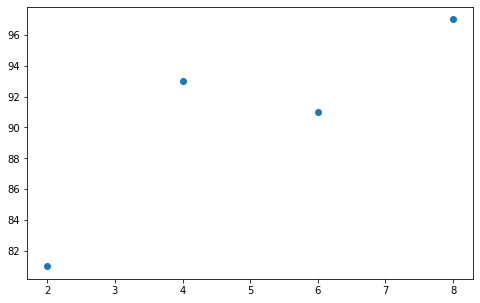

In [ ]:
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

손실함수(MSE)를 a와 b로 각각 편미분

In [ ]:
x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0

lr = 0.03
epochs = 2001

for i in range(epochs):
    y_pred = a * x_data + b
    error = y_data - y_pred

    a_diff = -(2/len(x_data)) * sum(error * x_data)
    b_diff = -(2/len(x_data)) * sum(error)

    a = a - lr * a_diff
    b = b - lr * b_diff

    if i % 100 ==0:
        print("epoch=%f, 기울기 = %.04f, 절편=%.04f" % (i,a,b))

epoch=0.000000, 기울기 = 27.8400, 절편=5.4300
epoch=100.000000, 기울기 = 7.0739, 절편=50.5117
epoch=200.000000, 기울기 = 4.0960, 절편=68.2822
epoch=300.000000, 기울기 = 2.9757, 절편=74.9678
epoch=400.000000, 기울기 = 2.5542, 절편=77.4830
epoch=500.000000, 기울기 = 2.3956, 절편=78.4293
epoch=600.000000, 기울기 = 2.3360, 절편=78.7853
epoch=700.000000, 기울기 = 2.3135, 절편=78.9192
epoch=800.000000, 기울기 = 2.3051, 절편=78.9696
epoch=900.000000, 기울기 = 2.3019, 절편=78.9886
epoch=1000.000000, 기울기 = 2.3007, 절편=78.9957
epoch=1100.000000, 기울기 = 2.3003, 절편=78.9984
epoch=1200.000000, 기울기 = 2.3001, 절편=78.9994
epoch=1300.000000, 기울기 = 2.3000, 절편=78.9998
epoch=1400.000000, 기울기 = 2.3000, 절편=78.9999
epoch=1500.000000, 기울기 = 2.3000, 절편=79.0000
epoch=1600.000000, 기울기 = 2.3000, 절편=79.0000
epoch=1700.000000, 기울기 = 2.3000, 절편=79.0000
epoch=1800.000000, 기울기 = 2.3000, 절편=79.0000
epoch=1900.000000, 기울기 = 2.3000, 절편=79.0000
epoch=2000.000000, 기울기 = 2.3000, 절편=79.0000


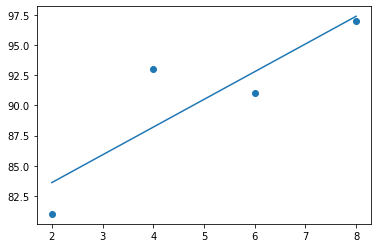

In [ ]:
y_pred = a*x_data + b

plt.scatter(x,y)
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)])
plt.show()

# 다중 선형 회귀 경사하강법
* x가 여러 개인 경우

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# 성적에 대한 공부량, 과외량 데이터
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

3d 시각화

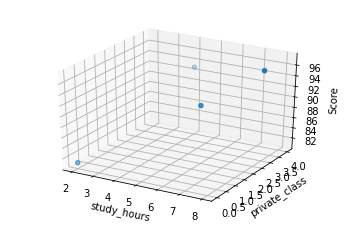

In [ ]:
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

In [ ]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기 a1, a2 및 절편 b 값 초기화
a1 = 0
a2 = 0
b = 0

lr = 0.05 # 학습률 설정
epochs = 2001 # 반복 횟수 설정

In [ ]:
for i in range(epochs):
    y_pred = a1 * x1_data + a2 * x2_data + b
    error = y_data - y_pred
    a1_diff = -(1/len(x1_data)) * sum(x1_data*(error))
    a2_diff = -(1/len(x2_data)) * sum(x2_data*(error))
    b_new = -(1/len(x1_data)) * sum(y_data-y_pred)
    
    # 기울기에 따른 pos 조정
    a1 = a1 - lr*a1_diff
    a2 = a2-lr*a2_diff
    b = b-lr*b_new

    if i%200 == 0:
        print('epoch=%f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f' % (i,a1,a2, b))

epoch=0.000000, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
epoch=200.000000, 기울기1=3.7255, 기울기2=3.0541, 절편=62.5766
epoch=400.000000, 기울기1=1.9527, 기울기2=2.4420, 절편=74.7491
epoch=600.000000, 기울기1=1.5921, 기울기2=2.3175, 절편=77.2250
epoch=800.000000, 기울기1=1.5187, 기울기2=2.2922, 절편=77.7286
epoch=1000.000000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
epoch=1200.000000, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1400.000000, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8561
epoch=1600.000000, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8569
epoch=1800.000000, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=2000.000000, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571


# 로지스틱 회귀와 경사하강법

## 로지스틱 회귀
* 참(1)인지 거짓(0)인지 분류하기 위한 모델
* ex) [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]

* 따라서 직선으로는 점들의 특성을 대표하기 어려움

* 하지만 결국 a,b를 찾는 문제
y = 1 / (1 + e ^ -(ax_b) )
* 이는 sigmoid 함수로 모델링 할 수 있음
* a가 커지면 step function 에 가까워지며, b값에 따라 그래프가 좌 우로 움직임

(-0.1, 1.1)

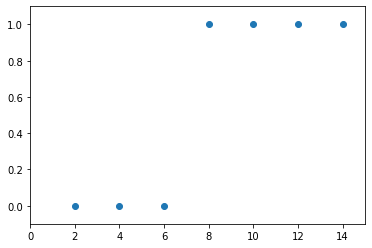

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

#데이터 시각화
plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-0.1,1.1)

In [ ]:
# 기울기 a와 절편 b 값 초기화
a = 0
b = 0

# 학습률
lr = 0.05

epochs = 2001

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [ ]:
for i in range(epochs):
    for xdata, ydata in data:
        a_diff = xdata*(sigmoid(a*xdata + b) - ydata)
        b_diff = sigmoid(a*xdata +b) - ydata

        a = a-lr*a_diff
        b = b-lr*b_diff

        if i % 1000 == 0:
            print("epoch = %d, 기울기 = %.04f, 절편 = %.04f" % (i,a,b))

epoch = 0, 기울기 = -0.0500, 절편 = -0.0250
epoch = 0, 기울기 = -0.1388, 절편 = -0.0472
epoch = 0, 기울기 = -0.2268, 절편 = -0.0619
epoch = 0, 기울기 = 0.1201, 절편 = -0.0185
epoch = 0, 기울기 = 0.2374, 절편 = -0.0068
epoch = 0, 기울기 = 0.2705, 절편 = -0.0040
epoch = 0, 기울기 = 0.2860, 절편 = -0.0029
epoch = 1000, 기울기 = 1.4978, 절편 = -9.9401
epoch = 1000, 기울기 = 1.4940, 절편 = -9.9411
epoch = 1000, 기울기 = 1.4120, 절편 = -9.9547
epoch = 1000, 기울기 = 1.4949, 절편 = -9.9444
epoch = 1000, 기울기 = 1.4982, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4984, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4985, 절편 = -9.9440
epoch = 2000, 기울기 = 1.9065, 절편 = -12.9489
epoch = 2000, 기울기 = 1.9055, 절편 = -12.9491
epoch = 2000, 기울기 = 1.8515, 절편 = -12.9581
epoch = 2000, 기울기 = 1.9057, 절편 = -12.9514
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513


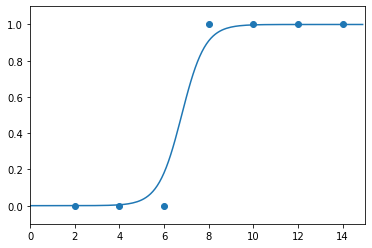

In [ ]:
#데이터 시각화
plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-0.1,1.1)
x_range = np.arange(0,15,0.1)
plt.plot(x_range, np.array([sigmoid(a*x +b) for x in x_range]))
plt.show()